# Linear convection with a step-function initial condition (IC) and appropiate boundary conditions (BCs)

## Linear Convection

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

Represents the propagation of a wave with speed $c$, without change of shape.

Let the initial condition be $u(x,0) = u_0 (x)$.
Then the exact solution to the equation is $u(x,t) = u_o (x - ct)$.

Discretize the linear convection equation in both time and space using a forward difference scheme for the time derivative and a backward difference scheme for the space derivative.

Discretize the spatial coordinate $x$ into points which we will index from $i = 0$ to $N$.
$n$ will index the time step.

One can easily arive at the discrete version of our linear convection equation:
$$
\frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} + c \frac{u_{i}^{n} - u_{i-1}^{n}}{\Delta x} = 0
$$

Given initial conditions, we only need to solve for $u_{i}^{n+1}$:

$$
u_{i}^{n+1} =  u_{i}^{n} - c \frac{\Delta t}{\Delta x} \left( u_{i}^{n} - u_{i-1}^{n} \right)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
%matplotlib inline

In [18]:
# Spatial domain (n units of length).
L = 2.0
# Number of spatial grid points.
nx = 41
dx = L / (nx -1)

# Number of time steps.
nt = 25
dt = 0.025

# Wave speed.
c = 1.0

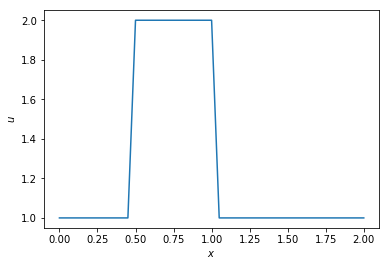

In [19]:
# Initial conditions - u = 2, 0.5 < x < 1; u = 1 elsewhere.
u = np.ones(nx)
u[int(0.5 / dx): int(1/dx+1)] = 2

plt.ylabel(r"$u$")
plt.xlabel(r"$x$")
plt.plot(np.linspace(0, 2, nx), u)
plt.show()

## Discretization of the linear convection equation using a finite difference scheme

In [20]:
# Initialize tmp array - soltn for the nex time step.
# Same dimentions as array u.
un = np.ones(nx)

for n in range(nt):
    # cp existing values of u in un.
    # un will hold the values at timestep n, u at n+1.
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c *(dt/dx)*(un[i] - un[i-1])

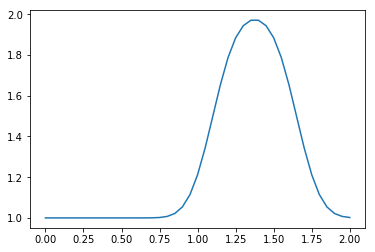

In [21]:
plt.plot(np.linspace(0, 2, nx), u)